In [1]:
import os
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))
sys.path.append(str(Path().resolve().parent.parent))

import numpy as np
import pandas as pd
import json

import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [2]:
import seaborn as sns

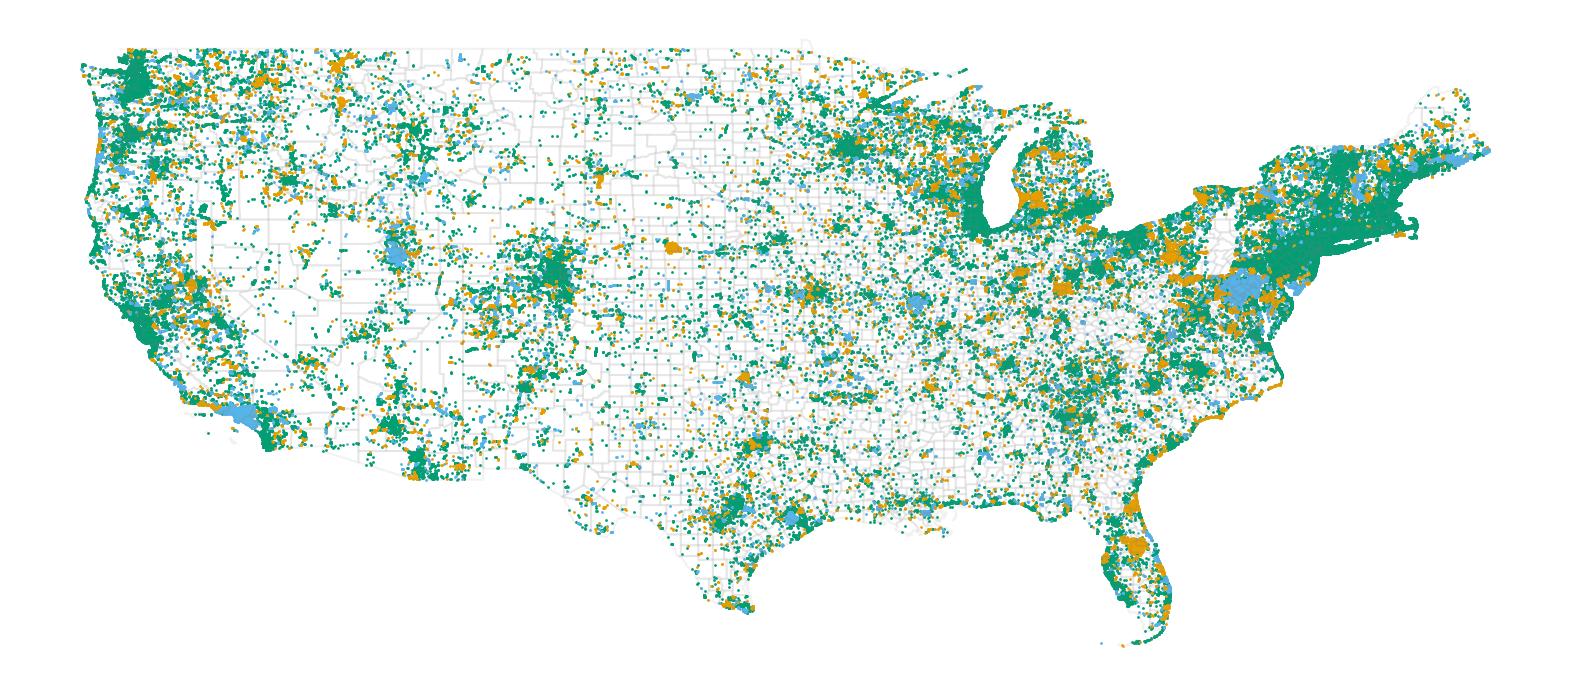

In [3]:
#map of hotspots

path = "/network/projects/_groups/ecosystem-embeddings/SatBird_data_v2/USA_summer/all_summer_hotspots_final.csv"

df = pd.read_csv(path)
df = df.drop_duplicates("hotspot_id")

geoDatav = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   


train = pd.read_csv("/network/projects/_groups/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_train.csv")
val = pd.read_csv("/network/projects/_groups/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_val.csv")
test = pd.read_csv("/network/projects/_groups/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_test.csv")
gdf["split"] = ""
idx = gdf[gdf["hotspot_id"].isin(list(train["hotspot_id"]))].index
gdf.loc[idx,"split"] = "train"

idx = gdf[gdf["hotspot_id"].isin(list(val["hotspot_id"]))].index
gdf.loc[idx,"split"] = "val"
idx = gdf[gdf["hotspot_id"].isin(list(test["hotspot_id"]))].index
gdf.loc[idx,"split"] = "test"


fig, ax = plt.subplots(figsize =(20,15))
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15", "72"])].boundary.plot(ax=ax, alpha = 0.1, edgecolor = "gray" )
gdf[gdf["split"]=="train"].plot(ax=ax,marker='o', color='#009E73', markersize=1, label = "train")
gdf[gdf["split"]=="val"].plot(ax=ax, marker='o', color='#56B4E9', markersize=1, label = "val")
gdf[gdf["split"]=="test"].plot(ax=ax, marker='o', color='#E69F00', markersize=1, label = "test")

#plt.legend(fontsize=16, markerscale=5,loc='lower right',  bbox_to_anchor=(0.92, 0.25))
#plt.title("Hotspots")
plt.axis('off')
plt.savefig("hotspots_satbird_summer.pdf",  bbox_inches='tight')
plt.show()


## Distribution of number of species

In [7]:
import json
from tqdm import tqdm

In [41]:
train = pd.read_csv("/network/projects/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_train.csv")

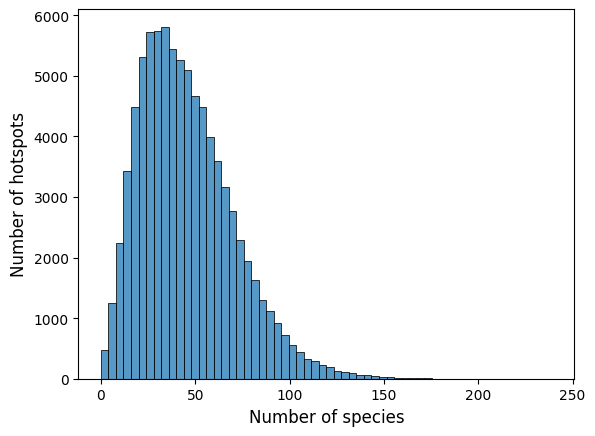

In [42]:
#train = pd.read_csv("train_summer_usa.csv" )#/network/projects/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_train.csv")
sns.histplot(train["num_different_species"].values, bins = 60)#, edgecolor='#169acf')
plt.xlabel('Number of species', fontsize = 12) 
plt.ylabel('Number of hotspots', fontsize = 12) 
plt.show()

In [45]:
test = pd.read_csv("/network/projects/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_test.csv")

In [ ]:
num_species = []
for i, row in test.iterrows():
    with open(os.path.join("/network/projects/ecosystem-embeddings/SatBird_data_v2/USA_summer/corrected_targets/", row["hotspot_id"] + ".json"), "r") as f:
        data = json.load(f)
    u = np.array(data["probs"])
    new = np.sum(u>0)
    if new != row["num_different_species"]:
        test.loc[i, "num_different_species"] = new

In [27]:
path = "/net"

,Unnamed: 0,hotspot_id,lon,lat,county,county_code,state,state_code,num_complete_checklists,num_different_species,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,hotspot_name,split
0,0,L11401626,36.749623,-1.375699,NaN,NaN,Nairobi,KE-110,1,71,...,858.0,191.0,18.0,76.348396,418.0,58.0,313.0,69.0,"Giraffe Sanctuary, Mukoma Road",train
1,1,L2741113,36.818962,-1.289669,NaN,NaN,Nairobi,KE-110,1,1,...,1008.0,236.0,23.0,78.986977,504.0,75.0,376.0,86.0,Uhuru Hwy,train
2,2,L18250077,36.818919,-1.390878,NaN,NaN,Nairobi,KE-110,1,5,...,858.0,191.0,18.0,76.348396,418.0,58.0,313.0,69.0,Kitengela Glass,train
3,3,L9899650,36.818691,-1.285615,NaN,NaN,Nairobi,KE-110,1,6,...,1008.0,236.0,23.0,78.986977,504.0,75.0,376.0,86.0,"-1.394, 37.038",train
4,4,L10178183,36.818632,-1.242108,NaN,NaN,Nairobi,KE-110,1,30,...,1008.0,236.0,23.0,78.986977,504.0,75.0,376.0,86.0,"Unnamed Road, Nairobi, Nairobi County, KE (-1....",train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,7005,L16581995,34.676891,0.012618,NaN,NaN,Western,KE-800,1,13,...,1877.0,278.0,77.0,36.166000,690.0,294.0,351.0,442.0,"Unnamed Road, Vihiga County, KE (0.013, 34.677)",train
6984,7006,L4911684,34.700265,0.278686,NaN,NaN,Western,KE-800,2,3,...,1896.0,264.0,70.0,37.563931,683.0,260.0,335.0,507.0,"0.2787x34.7003 - Sep 9, 2016, 7:54 AM",train
6985,7007,L15852050,34.732843,0.672123,NaN,NaN,Western,KE-800,2,6,...,1494.0,219.0,37.0,45.899960,568.0,151.0,360.0,475.0,"Bungoma County, KE (0.672, 34.733)",train
6986,7008,L1673129,34.625273,0.028854,NaN,NaN,Western,KE-800,2,27,...,1832.0,274.0,65.0,38.261032,685.0,282.0,327.0,418.0,KIST,train


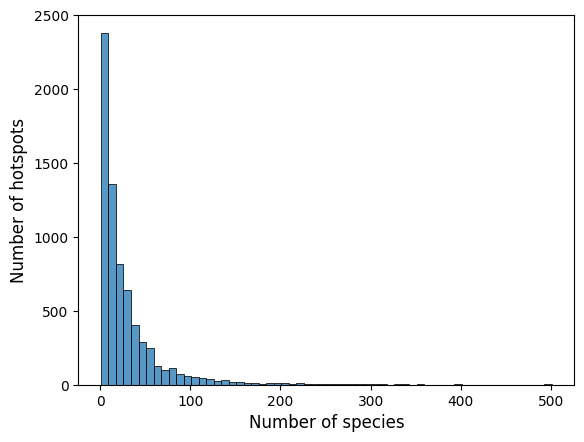

In [5]:

train = pd.read_csv("/network/projects/ecosystem-embeddings/SatBird_data_v2/Kenya/train_hotspots_kenya.csv")
sns.histplot(train["num_different_species"].values, bins = 60)#, edgecolor='#169acf')
plt.xlabel('Number of species', fontsize = 12) 
plt.ylabel('Number of hotspots', fontsize = 12) 
plt.savefig("kenya_species_dist.png")

## distribution of species by target encounter rates


In [22]:
targets = np.load("/network/projects/_groups/ecosystem-embeddings/SatBird_data_v2/exps/mosaiks/baselines_summer/y_train.npy")

In [28]:
mean_targets = targets.mean(axis = 0)

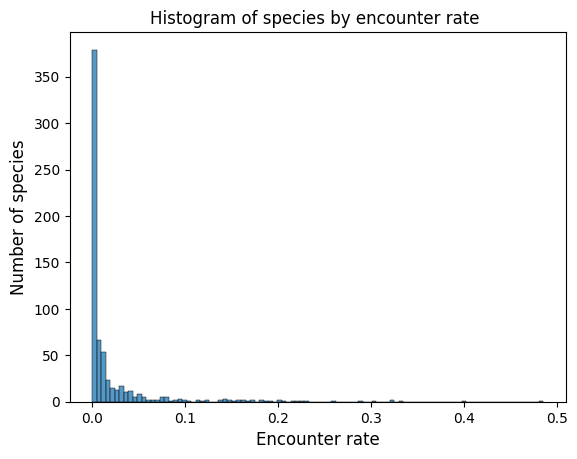

In [32]:
sns.histplot(mean_targets, bins = 100)
plt.xlabel('Encounter rate', fontsize = 12) 
plt.ylabel('Number of species', fontsize = 12) 
plt.title("Histogram of species by encounter rate ")
plt.savefig("speciesbyencounterrate.png")

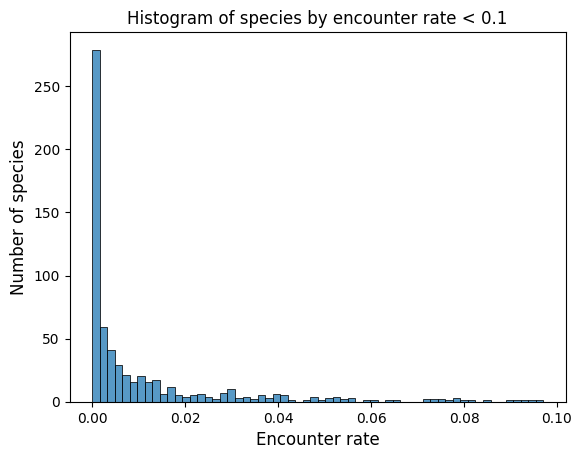

In [33]:
sns.histplot(mean_targets[mean_targets <= 0.1], bins = 60)
plt.xlabel('Encounter rate', fontsize = 12) 
plt.ylabel('Number of species', fontsize = 12) 
plt.title("Histogram of species by encounter rate < 0.1")
plt.savefig("speciesbyencounterrate-01.png")

## specific species

In [4]:
species = "/network/projects/ecosystem-embeddings/SatBird_data_v2/species_list_USA.txt"

with open(species, "r") as f:
    data = f.readlines()

spe = [s.strip("\n") for s in data]

np.where(np.array(spe) =="Turdus migratorius")

(array([631]),)

In [8]:
np.where(np.array(spe) =="Callipepla californica")

(array([137]),)

In [5]:
targets = np.load("/network/projects/_groups/ecosystem-embeddings/SatBird_data_v2/exps/mosaiks/baselines_summer/y_train.npy")

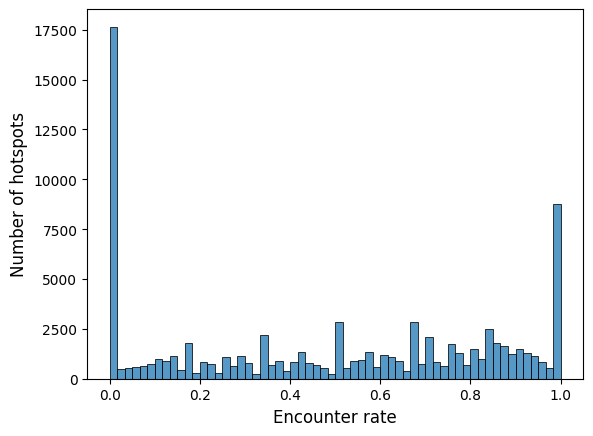

In [7]:
turdus = targets[:, 631]
sns.histplot(turdus, bins = 60)
plt.xlabel('Encounter rate', fontsize = 12) 
plt.ylabel('Number of hotspots', fontsize = 12) 
plt.savefig("encounter_american_robins.png")

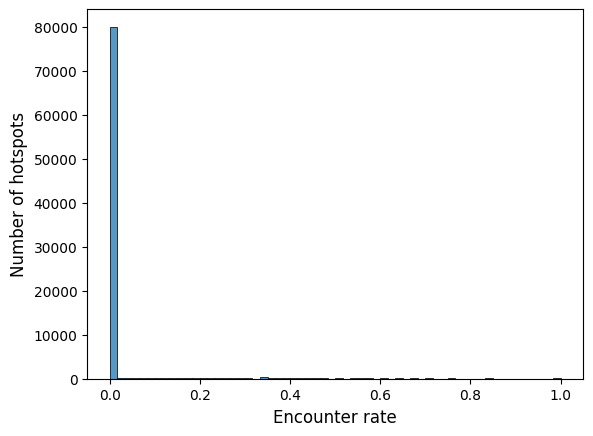

In [9]:
cali= targets[:, 137]
sns.histplot(cali, bins = 60)
plt.xlabel('Encounter rate', fontsize = 12) 
plt.ylabel('Number of hotspots', fontsize = 12) 
plt.savefig("encounter_California_quail.png")

Text(0, 0.5, 'Number of hotspots')

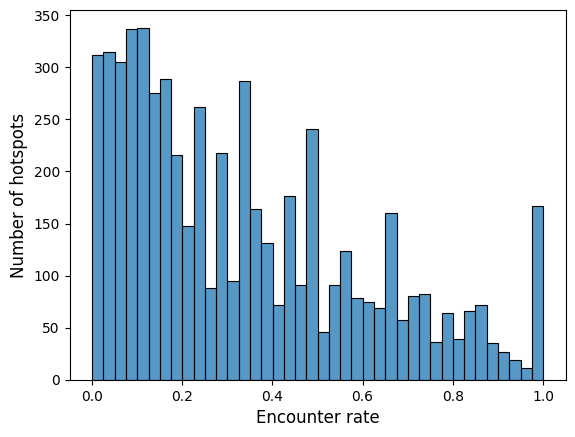

In [22]:
cali = targets[:, 137]
sns.histplot(cali[cali>0], bins = 40)
plt.xlabel('Encounter rate', fontsize = 12) 
plt.ylabel('Number of hotspots', fontsize = 12) 
#plt.savefig("encounter_California_quail_exclude0.png")

In [16]:
indices = np.where(cali>0)
train = pd.read_csv("/network/projects/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_train.csv")

In [20]:
train.loc[indices]["state"].value_counts()

California    3248
Washington     962
Oregon         921
Idaho          384
Nevada         168
Utah            65
Montana         10
Name: state, dtype: int64

## predictions

In [24]:
#save preds 
preds_path = "/network/projects/ecosystem-embeddings/USA_summer_weights/new_preds/"

test =  pd.read_csv("/network/projects/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_test.csv")

preds = np.zeros([len(test), 670])

for i, row in test.iterrows():
    preds[i, :] = np.load(os.path.join(preds_path, row["hotspot_id"] + ".npy"))

np.save("/network/projects/ecosystem-embeddings/preds_test_set.npy", preds)

In [83]:
#prediction vs target values 

pred = np.load("/network/projects/ecosystem-embeddings/preds_test_set.npy")
target = np.load("/network/projects/_groups/ecosystem-embeddings/SatBird_data_v2/exps/mosaiks/baselines_summer/y_test.npy")

In [84]:
assert pred.shape == target.shape

In [85]:
import numpy as np
import matplotlib.pyplot as plt
# Example predicted and target values (replace these with your data)
predicted_values = pred.flatten()
target_values = target.flatten()
# Calculate the regression errors
# Define the number of bins
num_bins = 19

# Discretize target values into bins
bin_indices = np.digitize(target_values, bins=np.linspace(min(target_values), max(target_values), num_bins))
errors = predicted_values - target_values

for i in range(num_bins):
    mean_errors[i] = np.mean(errors[bin_indices == i + 1])

bin_vals = np.linspace(min(target_values), max(target_values), num_bins)

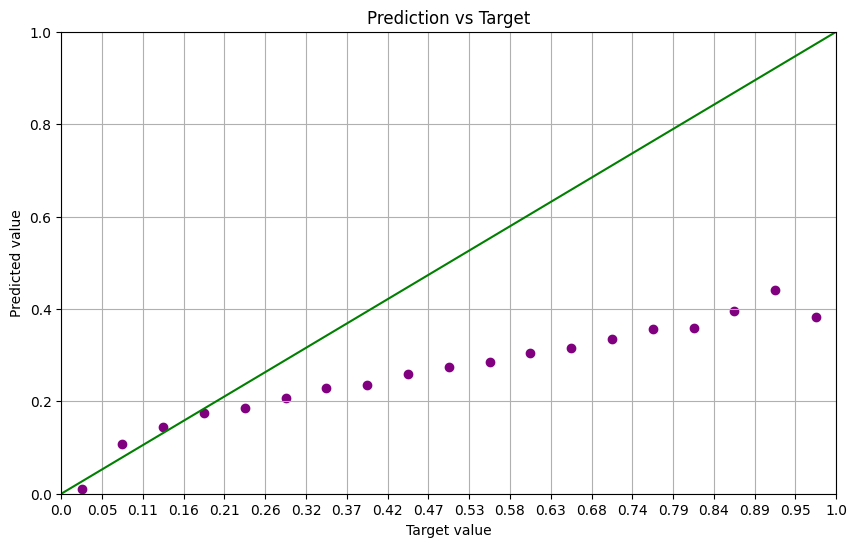

In [115]:
fig, ax = plt.subplots(figsize=(10, 6))
x = [i for i in range(20)]
y = x
# Plot the line x = y
ax.plot(x, y, color = "g")
ax.set_xlim(0, 19)
ax.set_ylim(0, 19)
# Plot points with error bars
a = [i+0.5 for i in x]
a = a[:-1]
ax.scatter(a, (bin_vals +  mean_errors)*19, color = "purple")
ax.set_xlabel('Target value')
ax.set_ylabel('Predicted value')
ax.set_title('Prediction vs Target')
ax.set_xticks([i for i in range(20)])
ax.set_yticks([i*19/5 for i in range(6)])
position = [round(i/5, 2) for i in range(6)]
ax.set_yticklabels(position)
position = [round(i/19, 2) for i in range(20)]
ax.set_xticklabels(position)
ax.grid(True)
plt.savefig("targetvspred.png")

## Mean regression error by target value

In [133]:
bin_indices = np.digitize(target_values, bins=np.linspace(min(target_values), max(target_values), num_bins))
errors = predicted_values - target_values
errors = errors**2

In [134]:
mean_errors = np.zeros(num_bins)
min_errors = np.zeros(num_bins)
max_errors = np.zeros(num_bins)
for i in range(num_bins):
    mean_errors[i] = np.mean(errors[bin_indices == i + 1])  # Bins are 1-indexed
    min_errors[i] = np.min(errors[bin_indices == i + 1]) 
    max_errors[i] = np.max(errors[bin_indices == i + 1]) 

In [135]:
position = [round(i/19, 2) for i in range(20)]

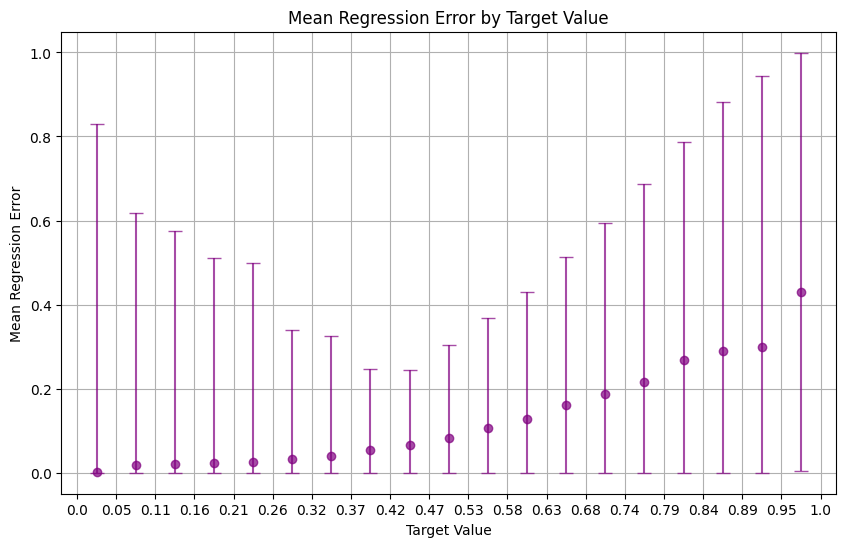

In [136]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot points with error bars
ax.errorbar([i+0.5 for i in range(19)], mean_errors, fmt='o',yerr=[mean_errors-min_errors, max_errors-mean_errors], capsize=5, alpha=0.7, label='Mean', color = "purple")
ax.set_xlabel('Target Value')
ax.set_ylabel('Mean Regression Error')
ax.set_title('Mean Regression Error by Target Value')
ax.set_xticks([i for i in range(20)])
ax.set_xticklabels(position)
ax.grid(True)

plt.savefig("regression_error_dist_by_target.png")
plt.show()
#plt.scatter(bins, min_errors, marker='o', color='blue', label='Min')
#plt.scatter(bins, max_errors, marker='o', color='red', label='Max')

## color hotspots by topk performance

In [2]:
import numpy as np
import pandas as pd

In [3]:
pred = np.load("/network/projects/ecosystem-embeddings/preds_test_set.npy")
gts = np.load("/network/projects/_groups/ecosystem-embeddings/SatBird_data_v2/exps/mosaiks/baselines_summer/y_test.npy")

In [5]:
test_df =  pd.read_csv("/network/projects/ecosystem-embeddings/SatBird_data_v2/USA_summer/summer_hotspots_test.csv")

In [7]:
test_df["mae"] = 0
test_df["mse"] = 0
test_df["non_zero"] = 0
test_df["topk"] = 0

for i, row in test_df.iterrows():
    preds = pred[i, :]
    gt = gts[i,:]
    test_df.loc[i, "mae"] = np.sum(np.abs(preds - gt))
    test_df.loc[i, "mse"] = np.sum(np.square(preds - gt))
    nonzero = len(np.nonzero(gt)[0])
    if nonzero != 0 :
        test_df.loc[i,"non_zero"] = nonzero
    
        indices_pred = (-preds).argsort()[:nonzero]
        indices_gt = np.nonzero(gt)[0]

        test_df.loc[i,"topk"] = len([a for a in indices_pred if a in indices_gt])/nonzero
    else:
        test_df.loc[i,"topk"] = -1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


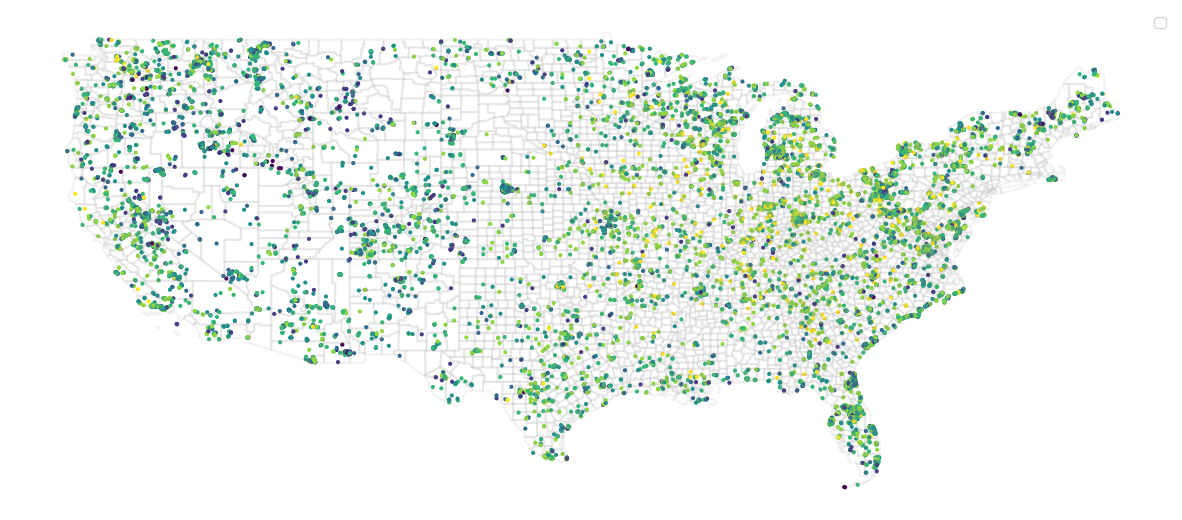

In [131]:
test_df["preds_"] = 7
test_df.loc[test_df["topk"]<0.85,"preds_"]  = 6
test_df.loc[test_df["topk"]<0.75,"preds_"]  = 5
test_df.loc[test_df["topk"]<0.65,"preds_"]  = 4
test_df.loc[test_df["topk"]<0.55,"preds_"]  = 3
test_df.loc[test_df["topk"]<0.45,"preds_"]  = 2
test_df.loc[test_df["topk"]==-1,"preds_"]  = 0
test_df.loc[test_df["topk"]==0,"preds_"]  = 1


geoDatav = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

geometry = [Point(xy) for xy in zip(test_df['lon'], test_df['lat'])]
test_gdf = gpd.GeoDataFrame(test_df, geometry=geometry)   


test_df["preds_"]= test_df["preds_"]/7
fig, ax = plt.subplots(figsize =(15,10))
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin([ "02","15", "72"])].boundary.plot(ax=ax, alpha = 0.1, edgecolor = "gray" )
#gdf[gdf["split"]=="train"].plot(ax=ax,marker='*', color='yellowgreen', markersize=5, label = "train")
test_gdf.plot(ax=ax, marker='o', c=test_df["preds_"], markersize=4, legend = True)#, label = legend1)

plt.legend()

plt.axis('off')
plt.savefig("adaptivetopk.png", bbox_inches="tight")